In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import sklearn.linear_model as sk_lm
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import random
from sklearn.utils import shuffle
from sklearn.model_selection  import train_test_split
import sklearn.linear_model as sk_lm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import os
import glob
#import 
%matplotlib inline

In [18]:
df = pd.read_csv("/media/radial/Work/Work/Work on datasets/Linear*/Camera.csv", sep=";")
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0


In [22]:
df.drop(0,axis = 0,inplace=True)
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
5,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [23]:
df.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [25]:
for i in df.columns:
    print(i,df[i].value_counts())
    print("__________________________________________")

Model Casio QV-5700                 1
Fujifilm FinePix F455 Zoom    1
Olympus Stylus 750            1
Casio Exilim EX-Z3            1
Kodak Z650                    1
Canon PowerShot A620          1
Olympus FE-170                1
Fujifilm MX-600 Zoom          1
Panasonic Lumix DMC-L10       1
Olympus SP-550 UZ             1
HP Photosmart 635             1
Fujifilm FinePix F480 Zoom    1
Sony DSC-P200                 1
Epson PhotoPC L-500V          1
Casio QV-R40                  1
Panasonic Lumix DMC-FX2       1
Kodak Z712                    1
Nikon Coolpix 600             1
Ricoh RDC-i700                1
Canon PowerShot G3            1
Kodak DC3200                  1
Olympus C-60 Zoom             1
Pentax Optio S10              1
Sony DSC-W35                  1
Olympus D-580 Zoom            1
Epson PhotoPC 700             1
Canon PowerShot A430          1
Kodak Z740                    1
Canon PowerShot A510          1
Nikon D70s                    1
                             ..
Ol

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 1 to 1038
Data columns (total 13 columns):
Model                      1038 non-null object
Release date               1038 non-null object
Max resolution             1038 non-null object
Low resolution             1038 non-null object
Effective pixels           1038 non-null object
Zoom wide (W)              1038 non-null object
Zoom tele (T)              1038 non-null object
Normal focus range         1038 non-null object
Macro focus range          1037 non-null object
Storage included           1036 non-null object
Weight (inc. batteries)    1036 non-null object
Dimensions                 1036 non-null object
Price                      1038 non-null object
dtypes: object(13)
memory usage: 113.5+ KB


In [28]:
df.describe()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038,1038,1038,1038,1038,1038,1038,1038,1037,1036,1036,1036,1038
unique,1038,14,99,70,16,25,100,32,29,44,237,101,43
top,Casio QV-5700,2007,3072.0,2048.0,3.0,38.0,114.0,50.0,10.0,16.0,320.0,90.0,149.0
freq,1,163,108,187,197,259,163,286,200,279,34,48,112


In [31]:
df[['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']] = df[['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']].astype(float)

In [32]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


# Data cleaning (imputation)

In [47]:
df[df["Macro focus range"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [98]:
#  the numbers here are all whole, mean is ~8, mode is 6
# finding out what were the MFRs of similar other features
nfr50 = df[df["Normal focus range"]==50.0]
nfr50118 = nfr50[nfr50["Zoom tele (T)"]>115.0 ]
nfr50118l = nfr50118[nfr50118["Zoom tele (T)"]<121]
nfr50118l["Macro focus range"].mean()
# Imputing 9 as MRF for 346

9.318181818181818

In [87]:
df.set_value(347,"Macro focus range", 9.0)
df[df["Macro focus range"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,8


In [88]:
df[df["Storage included"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,8
346,HP Photosmart R927,2006.0,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0,NaN
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,9.0,NaN,NaN,NaN,179.0,9.0


In [128]:
#  the numbers here are all whole, mean is ~17, mode is 16
# finding out what were the MFRs of similar other features for 346
nfr50 = df[df["Normal focus range"]==50.0]

nfr50100 = nfr50[nfr50["Zoom tele (T)"]>100.0 ]
nfr50110 = nfr50[nfr50["Zoom tele (T)"]<110.0 ]
nfr50l = pd.concat((nfr50100,nfr50110))

nfr507 = nfr50l[nfr50l["Effective pixels"]>7.0 ]
nfr509 = nfr50l[nfr50l["Effective pixels"]<9.0 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr507 = nfr50p[nfr50p["Max resolution"]>2500 ]
nfr509 = nfr50p[nfr50p["Max resolution"]<3500 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr50p = nfr50p[nfr50p["Release date"]==2007]
nfr50p["Storage included"].mean()

#nfr50ll["Storage included"].mean()
# Imputing 28 as SI for 346

28.703225806451613

In [114]:
df.set_value(346,"Storage included", 28)
df[df["Storage included"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,8
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,9.0,NaN,NaN,NaN,179.0,9.0


In [134]:
#  the numbers here are all whole, mean is ~17, mode is 16
# finding out what were the MFRs of similar other features for 347
nfr50 = df[df["Normal focus range"]==50.0]
nfr50100 = nfr50[nfr50["Zoom tele (T)"]>115.0 ]
nfr50110 = nfr50[nfr50["Zoom tele (T)"]<121.0 ]
nfr50l = pd.concat((nfr50100,nfr50110))

nfr507 = nfr50l[nfr50l["Zoom wide (W)"]>35 ]
nfr509 = nfr50l[nfr50l["Zoom wide (W)"]<42 ]
nfr50l = pd.concat((nfr507,nfr509))

nfr507 = nfr50l[nfr50l["Effective pixels"]>7.0 ]
nfr509 = nfr50l[nfr50l["Effective pixels"]<9.0 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr50u = nfr50p[nfr50p["Low resolution"]==0.0]

nfr507 = nfr50u[nfr50u["Max resolution"]>3290 ]
nfr509 = nfr50u[nfr50u["Max resolution"]<3300 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr50p = nfr50p[nfr50p["Release date"]==2007]
nfr50p["Storage included"].mean()

# Imputing 28 as SI for 347

28.307692307692307

In [116]:
df.set_value(347,"Storage included", 28.0)
df[df["Storage included"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,8


In [49]:
df[df["Weight (inc. batteries)"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
346,HP Photosmart R927,2006.0,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [133]:
#  the numbers here are all whole, mean is ~319, mode is 226
# finding out what were the MFRs of similar other features for 346
nfr50 = df[df["Normal focus range"]==50.0]

nfr50100 = nfr50[nfr50["Zoom tele (T)"]>100.0 ]
nfr50110 = nfr50[nfr50["Zoom tele (T)"]<110.0 ]
nfr50l = pd.concat((nfr50100,nfr50110))

nfr507 = nfr50l[nfr50l["Zoom wide (W)"]>30 ]
nfr509 = nfr50l[nfr50l["Zoom wide (W)"]<40 ]
nfr50l = pd.concat((nfr507,nfr509))

nfr507 = nfr50l[nfr50l["Effective pixels"]>7.0 ]
nfr509 = nfr50l[nfr50l["Effective pixels"]<9.0 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr507 = nfr50p[nfr50p["Low resolution"]>2000 ]
nfr509 = nfr50p[nfr50p["Low resolution"]<3000 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr507 = nfr50p[nfr50p["Max resolution"]>2500 ]
nfr509 = nfr50p[nfr50p["Max resolution"]<3500 ]
nfr50p = pd.concat((nfr507,nfr509))


nfr50p = nfr50p[nfr50p["Release date"]==2006]
nfr50p["Weight (inc. batteries)"].mean()

#nfr50ll["Storage included"].mean()
# Imputing 210 as Weight for 346

210.54545454545453

In [130]:
df.set_value(346,"Weight (inc. batteries)", 210)
df[df["Weight (inc. batteries)"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,8
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,9.0,28.0,NaN,NaN,179.0,9.0


In [135]:
#  the numbers here are all whole, mean is ~319, mode is 226
# finding out what were the MFRs of similar other features for 347
nfr50 = df[df["Normal focus range"]==50.0]

nfr50100 = nfr50[nfr50["Zoom tele (T)"]>115 ]
nfr50110 = nfr50[nfr50["Zoom tele (T)"]<121 ]
nfr50l = pd.concat((nfr50100,nfr50110))

nfr507 = nfr50l[nfr50l["Zoom wide (W)"]>35 ]
nfr509 = nfr50l[nfr50l["Zoom wide (W)"]<44 ]
nfr50l = pd.concat((nfr507,nfr509))


nfr507 = nfr50l[nfr50l["Effective pixels"]>7.0 ]
nfr509 = nfr50l[nfr50l["Effective pixels"]<9.0 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr50p = nfr50p[nfr50p["Low resolution"]==0.0]

nfr507 = nfr50p[nfr50p["Max resolution"]>3200 ]
nfr509 = nfr50p[nfr50p["Max resolution"]<3400 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr50p = nfr50p[nfr50p["Release date"]==2007]
nfr50p["Weight (inc. batteries)"].mean()

#nfr50ll["Storage included"].mean()
# Imputing 206 as Weight for 347

198.2

In [136]:
df.set_value(347,"Weight (inc. batteries)", 198)
df[df["Weight (inc. batteries)"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,8


In [50]:
df[df["Dimensions"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
346,HP Photosmart R927,2006.0,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [137]:
#  the numbers here are all whole, mean is ~105, mode is 101
# finding out what were the MFRs of similar other features for 346
nfr50 = df[df["Normal focus range"]==50.0]

nfr50100 = nfr50[nfr50["Zoom tele (T)"]>100.0 ]
nfr50110 = nfr50[nfr50["Zoom tele (T)"]<110.0 ]
nfr50l = pd.concat((nfr50100,nfr50110))

nfr507 = nfr50l[nfr50l["Zoom wide (W)"]>30 ]
nfr509 = nfr50l[nfr50l["Zoom wide (W)"]<40 ]
nfr50l = pd.concat((nfr507,nfr509))

nfr507 = nfr50l[nfr50l["Effective pixels"]>7.0 ]
nfr509 = nfr50l[nfr50l["Effective pixels"]<9.0 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr507 = nfr50p[nfr50p["Low resolution"]>2000 ]
nfr509 = nfr50p[nfr50p["Low resolution"]<3000 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr507 = nfr50p[nfr50p["Max resolution"]>2500 ]
nfr509 = nfr50p[nfr50p["Max resolution"]<3500 ]
nfr50p = pd.concat((nfr507,nfr509))


nfr50p = nfr50p[nfr50p["Release date"]==2006]
nfr50p["Dimensions"].mean()

#nfr50ll["Storage included"].mean()
# Imputing 210 as Weight for 346

96.3391812865497

In [138]:
df.set_value(346,"Dimensions", 96)
df[df["Dimensions"].isnull()==True]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,8
347,HP Photosmart R937,2007.0,3298.0,0.0,8.0,39.0,118.0,50.0,9.0,28.0,198.0,NaN,179.0,9.0


In [139]:
#  the numbers here are all whole, mean is ~105, mode is 101
# finding out what were the MFRs of similar other features for 347
nfr50 = df[df["Normal focus range"]==50.0]

nfr50100 = nfr50[nfr50["Zoom tele (T)"]>115 ]
nfr50110 = nfr50[nfr50["Zoom tele (T)"]<121 ]
nfr50l = pd.concat((nfr50100,nfr50110))

nfr507 = nfr50l[nfr50l["Zoom wide (W)"]>35 ]
nfr509 = nfr50l[nfr50l["Zoom wide (W)"]<44 ]
nfr50l = pd.concat((nfr507,nfr509))


nfr507 = nfr50l[nfr50l["Effective pixels"]>7.0 ]
nfr509 = nfr50l[nfr50l["Effective pixels"]<9.0 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr50p = nfr50p[nfr50p["Low resolution"]==0.0]

nfr507 = nfr50p[nfr50p["Max resolution"]>3200 ]
nfr509 = nfr50p[nfr50p["Max resolution"]<3400 ]
nfr50p = pd.concat((nfr507,nfr509))

nfr50p = nfr50p[nfr50p["Release date"]==2007]
nfr50p["Dimensions"].mean()

#nfr50ll["Storage included"].mean()
# Imputing 206 as Weight for 347

97.2

In [140]:
df.set_value(347,"Dimensions", 97)
df.isnull().sum()

Model                         0
Release date                  0
Max resolution                0
Low resolution                0
Effective pixels              0
Zoom wide (W)                 0
Zoom tele (T)                 0
Normal focus range            0
Macro focus range             0
Storage included              0
Weight (inc. batteries)       0
Dimensions                    0
Price                         0
8                          1037
dtype: int64

In [148]:
df.drop(["Unnamed: 0","8"],axis=1,inplace=True)
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997.0,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998.0,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000.0,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999.0,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999.0,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [149]:
df.to_csv("/media/radial/Work/Work/Work on datasets/Linear*/imputed.csv")

In [4]:
df = pd.read_csv("/media/radial/Work/Work/Work on datasets/Linear*/imputed.csv")
df.drop("Unnamed: 0",axis = 1,inplace=True)
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997.0,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998.0,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000.0,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999.0,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999.0,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


Release date -----------------------------------------------------------------


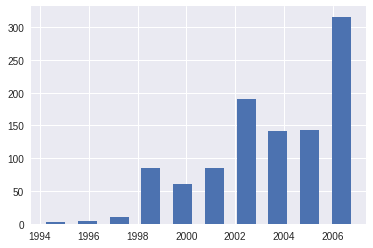

Max resolution -----------------------------------------------------------------


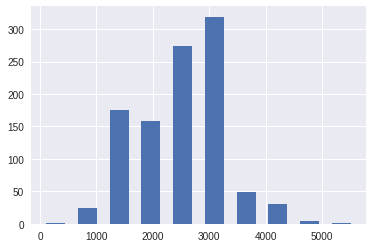

Low resolution -----------------------------------------------------------------


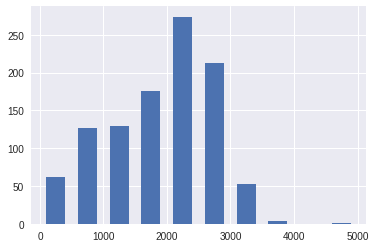

Effective pixels -----------------------------------------------------------------


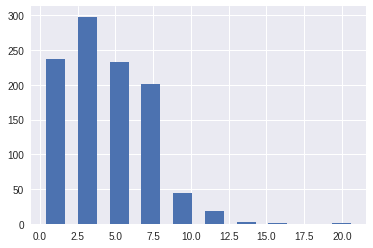

Zoom wide (W) -----------------------------------------------------------------


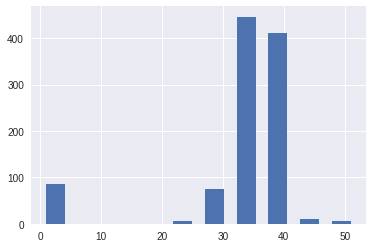

Zoom tele (T) -----------------------------------------------------------------


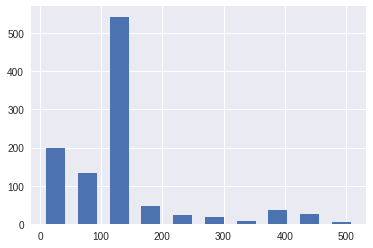

Normal focus range -----------------------------------------------------------------


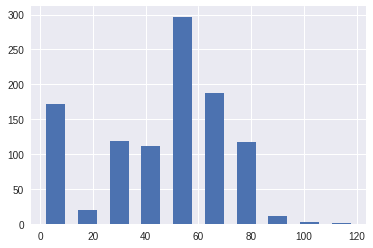

Macro focus range -----------------------------------------------------------------


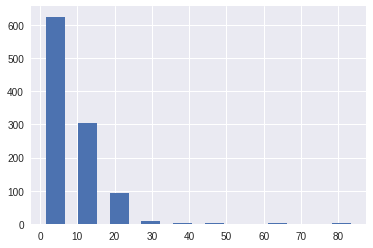

Storage included -----------------------------------------------------------------


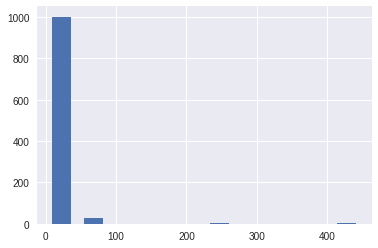

Weight (inc. batteries) -----------------------------------------------------------------


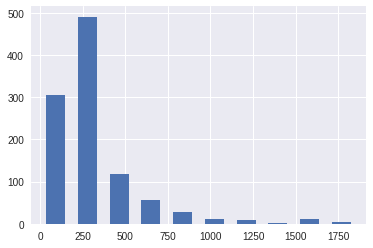

Dimensions -----------------------------------------------------------------


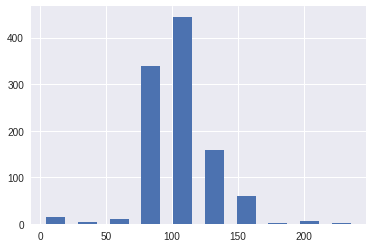

Price -----------------------------------------------------------------


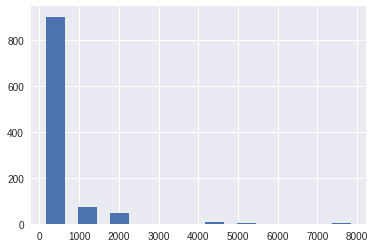

In [151]:
n_cols = ['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']
for i in n_cols:
    try:
        print(i,"-----------------------------------------------------------------")
        plt.hist(df[i],rwidth=0.6)
        plt.show()
    except ValueError:
        ""

# Data split

In [5]:
df.shape

(1038, 13)

In [161]:
1038*70/100  #training

726.6

In [160]:
1038*20/100  #Validation

207.6

In [162]:
1038*10/100  #Test

103.8

In [6]:
df = shuffle(df)

In [7]:
test = df[-103:]
test.shape

(103, 13)

In [171]:
1038-103

935

In [8]:
df = df[:-103]
df.shape

(935, 13)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df[['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions']],df.Price, test_size=207, random_state=666)

# Correlation

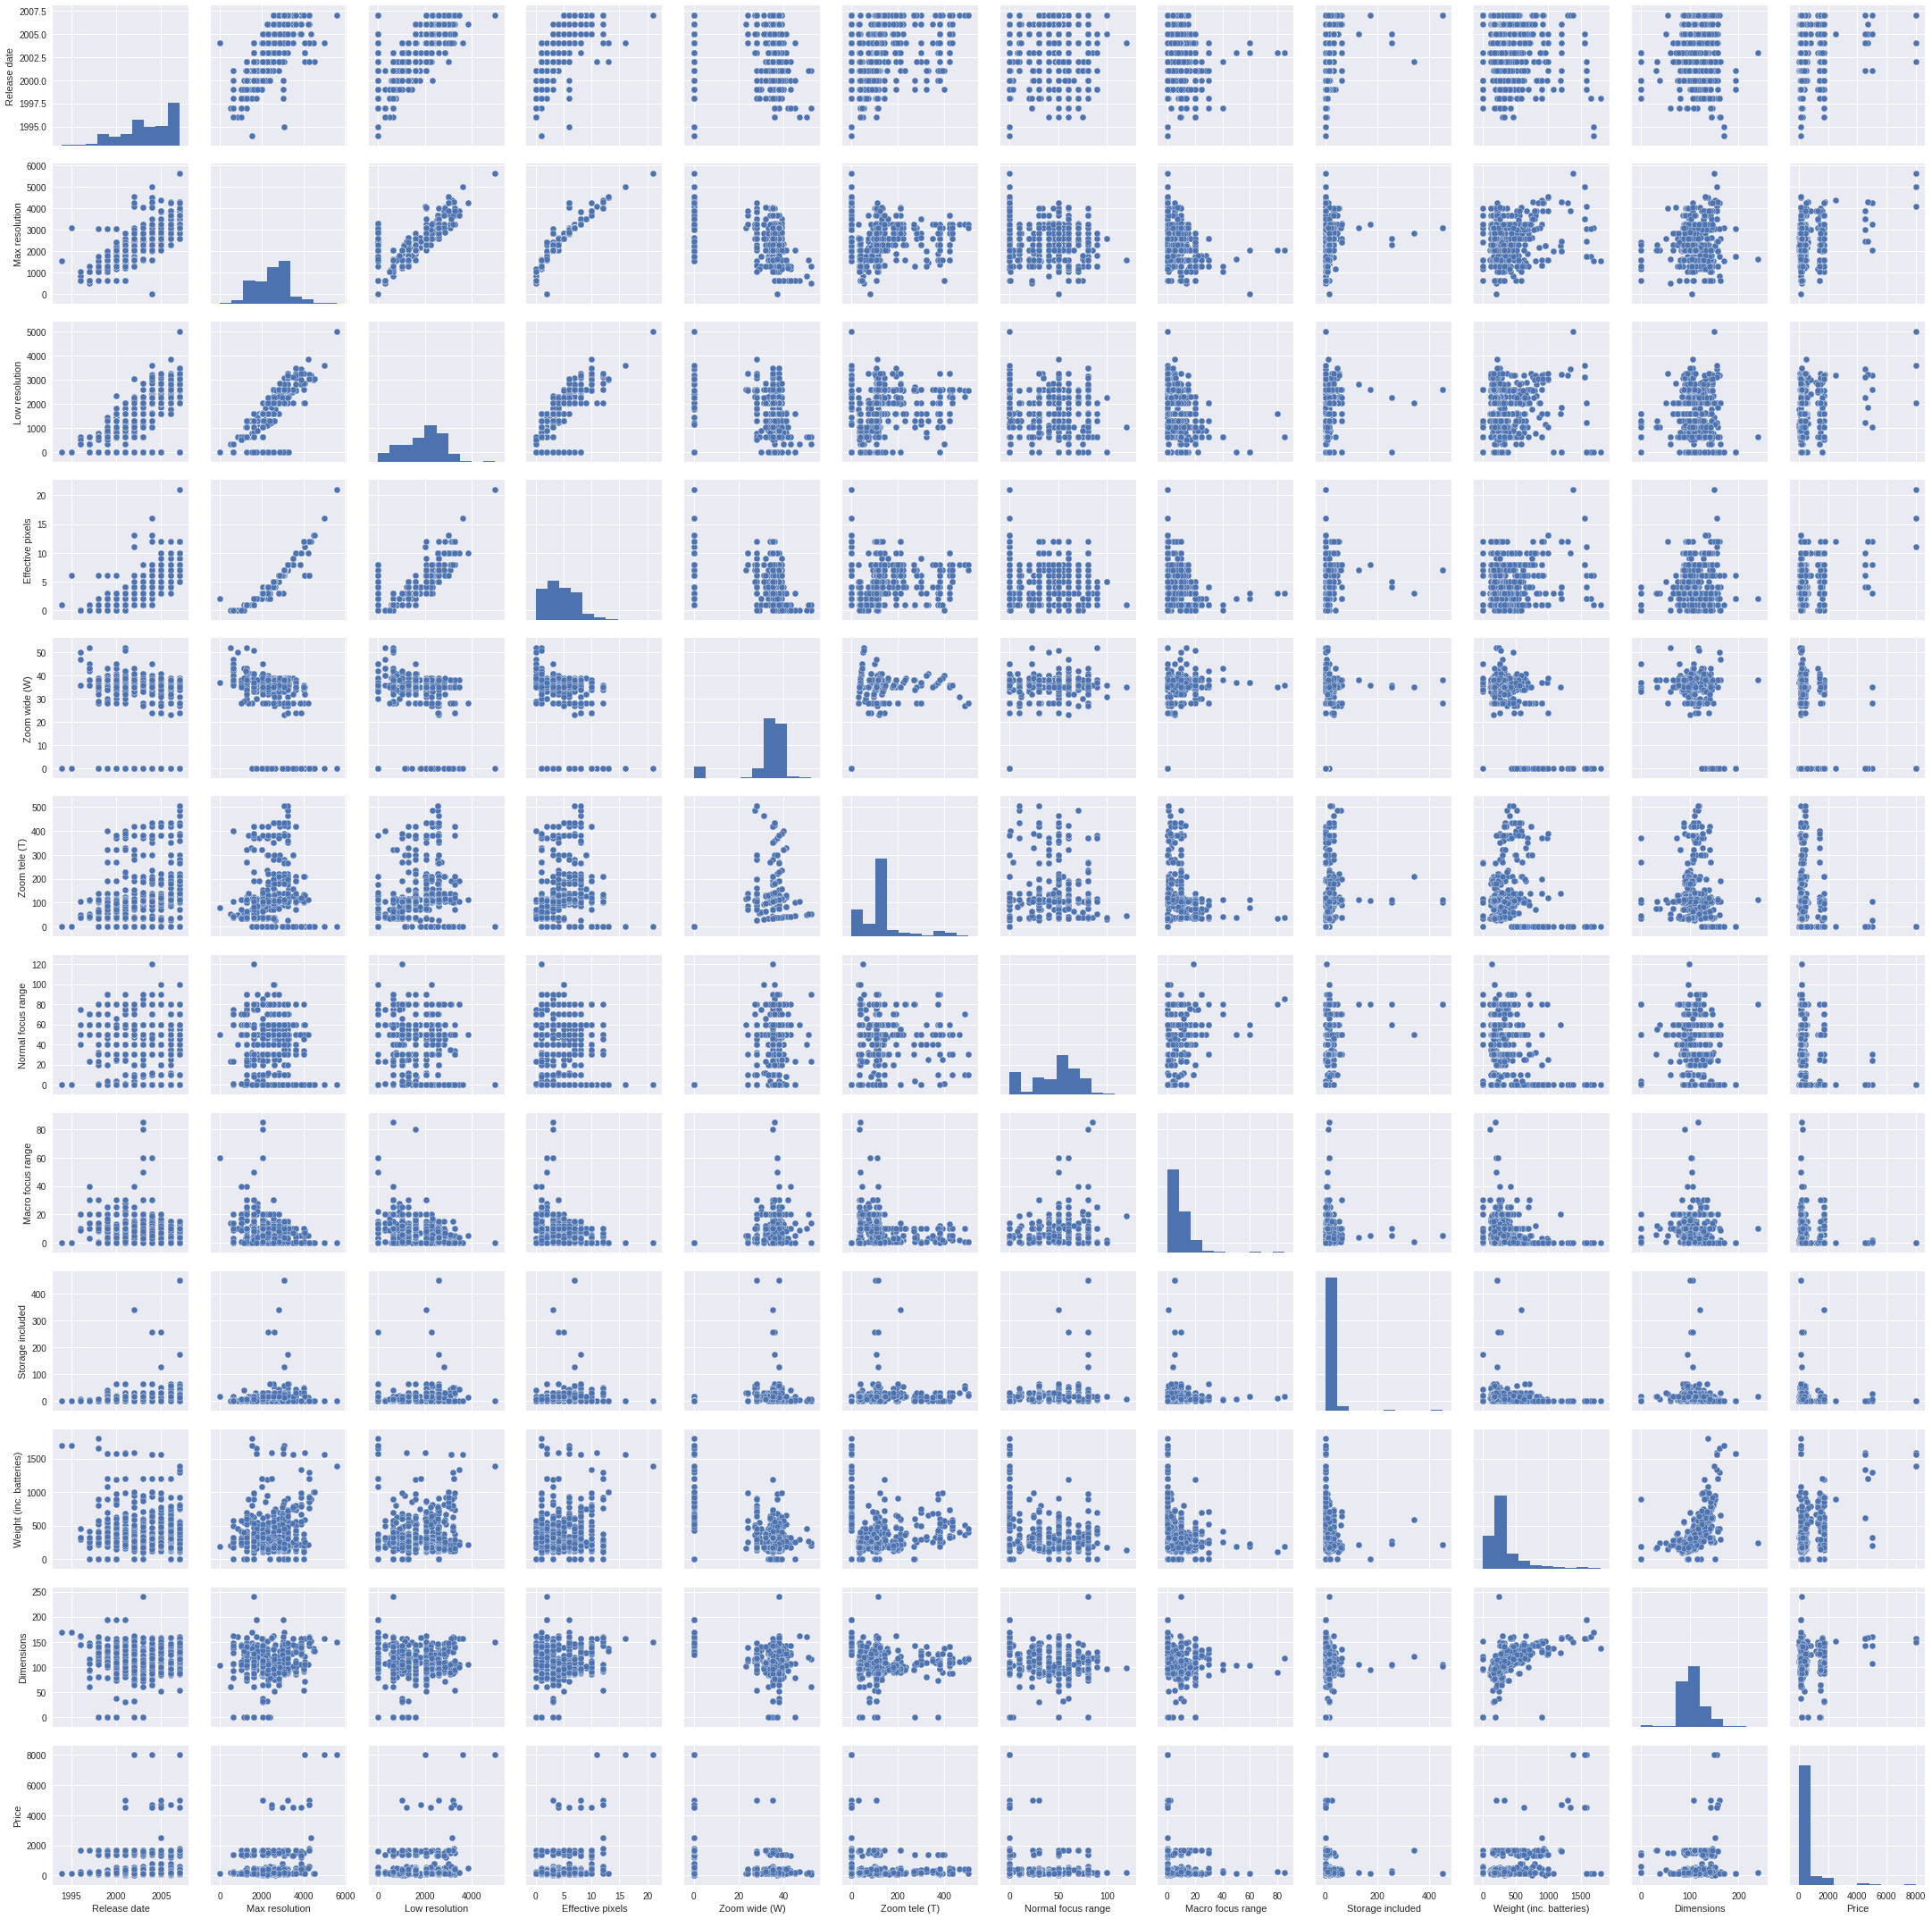

In [177]:
sns.pairplot(df)

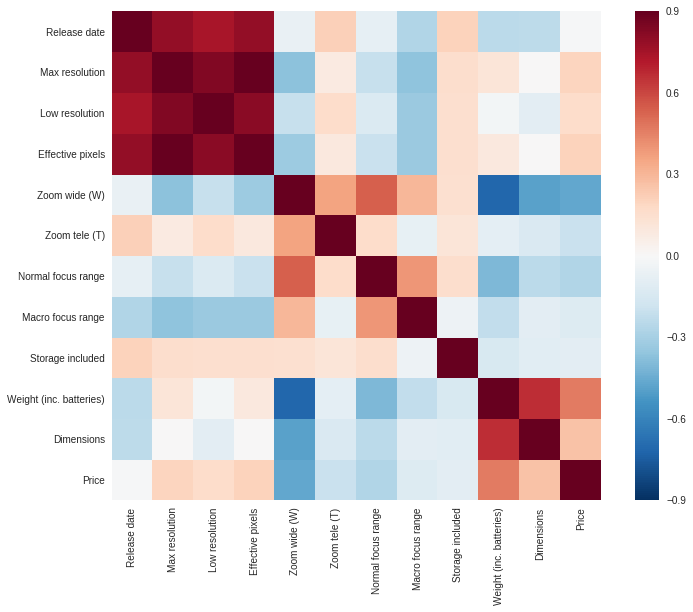

In [178]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True)

# Feature exploration

In [42]:
df.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')

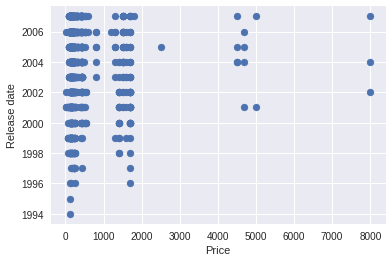

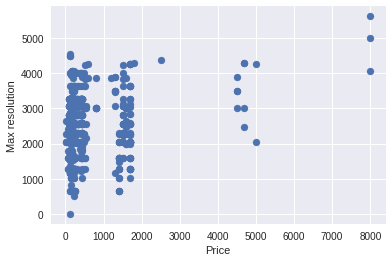

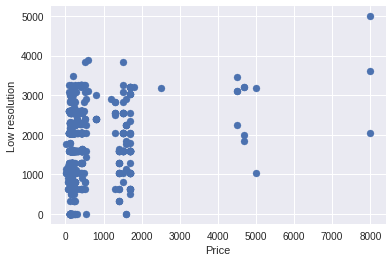

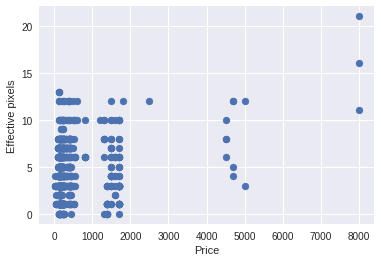

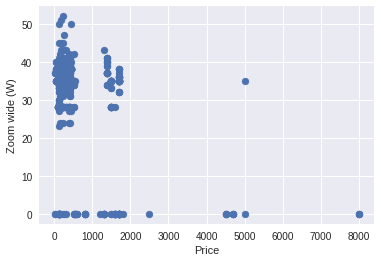

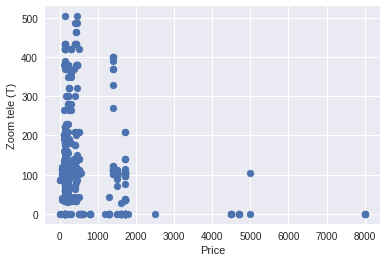

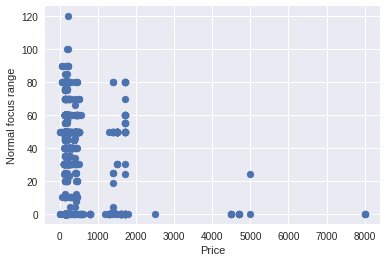

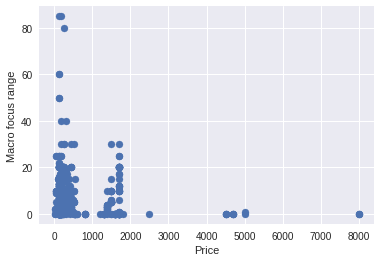

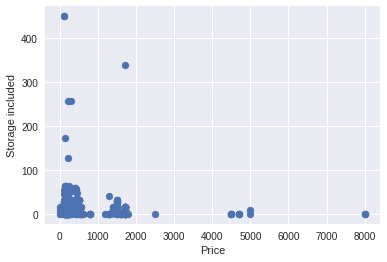

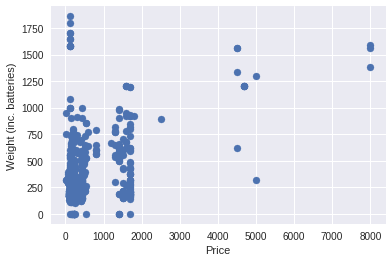

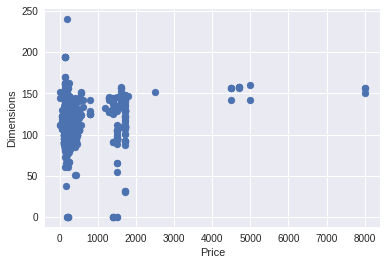

In [99]:
for i in df.columns[1:-1]:
    plt.scatter(df.Price,df[i])
    plt.xlabel("Price")
    plt.ylabel(i)
    plt.show()

In [ ]:
#Stepwise forward selection

In [11]:
model_LR = sk_lm.LinearRegression()

In [67]:
x=scale(x_train["Release date"], with_mean=True, with_std=False).reshape(-1,1)
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-1-1))
print("Adjusted R square = ",ar2)

458.163461538
[-0.13268966]
R square =  2.37033209172e-07
Adjusted R square =  -0.00137717310862


In [77]:
x=x_train[["Release date","Zoom wide (W)"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-2-1))
print("Adjusted R square = ",ar2)

30420.7603398
[-14.38421514 -34.9549655 ]
R square =  0.247531851998
Adjusted R square =  0.245456077796


In [78]:
x=x_train[["Release date","Zoom wide (W)","Weight (inc. batteries)"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-3-1))
print("Adjusted R square = ",ar2)

-14619.0801455
[  7.71728273 -20.03438452   0.84264469]
R square =  0.282793885989
Adjusted R square =  0.279822037451


In [79]:
x=x_train[["Release date","Zoom wide (W)","Weight (inc. batteries)","Dimensions"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-4-1))
print("Adjusted R square = ",ar2)

-6217.68243463
[  3.73204649 -20.960566     1.09232823  -4.42141854]
R square =  0.294459981048
Adjusted R square =  0.290556578453


In [80]:
#[', 'Low resolution','Effective pixels', 'Zoom tele (T)','Normal focus range', 'Macro focus range', 'Storage included',
x=x_train[["Release date","Zoom wide (W)","Weight (inc. batteries)","Dimensions","Max resolution"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-5-1))
print("Adjusted R square = ",ar2)

40848.5464073
[-19.89675601 -19.75922349   1.02269327  -4.37020947   0.10258878]
R square =  0.297278185745
Adjusted R square =  0.292411691186


In [81]:
#[', '','Effective pixels', 'Zoom tele (T)','Normal focus range', 'Macro focus range', 'Storage included',
x=x_train[["Release date","Zoom wide (W)","Weight (inc. batteries)","Dimensions","Max resolution","Low resolution"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-6-1))
print("Adjusted R square = ",ar2)

64352.8833715
[-31.61189641 -20.29886095   1.0622679   -4.20526709  -0.08372596
   0.23513331]
R square =  0.316490562074
Adjusted R square =  0.310802550108


In [82]:
#[', '','', 'Zoom tele (T)','Normal focus range', 'Macro focus range', 'Storage included',
x=x_train[["Release date","Zoom wide (W)","Weight (inc. batteries)","Dimensions","Max resolution","Low resolution","Effective pixels"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-7-1))
print("Adjusted R square = ",ar2)

76838.886446
[-37.68506387 -20.72589583   1.05926902  -4.38875167  -0.33786714
   0.22516575  78.3987332 ]
R square =  0.324189338935
Adjusted R square =  0.317618957508


In [83]:
#[', '','', ,'Normal focus range', 'Macro focus range', 'Storage included',
x=x_train[["Release date","Zoom wide (W)","Weight (inc. batteries)","Dimensions","Max resolution","Zoom tele (T)","Low resolution","Effective pixels"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-8-1))
print("Adjusted R square = ",ar2)

44104.6034394
[-21.44006312 -12.18768814   1.34829749  -4.75195599  -0.34853841
  -1.18575056   0.2480494   74.56051715]
R square =  0.339304628966
Adjusted R square =  0.331953359191


In [88]:
# best adjusted r2 out of all

In [84]:
#[', '','', , 'Macro focus range', 'Storage included',
x=x_train[["Release date","Zoom wide (W)",'Normal focus range',"Weight (inc. batteries)","Dimensions","Max resolution","Zoom tele (T)","Low resolution","Effective pixels"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-9-1))
print("Adjusted R square = ",ar2)

45586.6311638
[-22.18334947 -11.63532699  -0.48108979   1.34074797  -4.71006738
  -0.34424068  -1.18341696   0.24786121  73.97390725]
R square =  0.339466518927
Adjusted R square =  0.331186851337


In [85]:
#[', '','', , 'Storage included',
x=x_train[["Release date",'Macro focus range',"Zoom wide (W)",'Normal focus range',"Weight (inc. batteries)","Dimensions","Max resolution","Zoom tele (T)","Low resolution","Effective pixels"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-10-1))
print("Adjusted R square = ",ar2)

46572.235615
[-22.69278536   2.80794719 -11.72972826  -0.82921296   1.34361729
  -4.73996397  -0.33201019  -1.14696468   0.25216793  72.031011  ]
R square =  0.340242097465
Adjusted R square =  0.331040453079


In [86]:
x=x_train[["Release date",'Macro focus range','Storage included',"Zoom wide (W)",'Normal focus range',"Weight (inc. batteries)","Dimensions","Max resolution","Zoom tele (T)","Low resolution","Effective pixels"]]
model_LR.fit(x,y_train)
print(model_LR.intercept_)
print(model_LR.coef_)
weight_pred = model_LR.predict(x)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)
n = x_train.shape[0]
ar2 = 1-((1-r2)*(n-1)/(n-11-1))
print("Adjusted R square = ",ar2)

46659.2929512
[ -2.27354014e+01   2.81695460e+00   5.99815835e-02  -1.17615625e+01
  -8.35159061e-01   1.34369506e+00  -4.74108298e+00  -3.32818032e-01
  -1.14742035e+00   2.52332257e-01   7.21161846e+01]
R square =  0.340244840588
Adjusted R square =  0.330108937301


In [ ]:
#Regularization

In [91]:
#Ridge
model_ridge = RidgeCV(alphas =[0.1,0.5,1.0,10,100,500,1000])
model_ridge.fit(x_train,y_train)
pred = model_ridge.predict(x_train)
print(model_ridge.intercept_)
print(model_ridge.coef_)
print(model_ridge.alpha_)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)

21977.9970609
[-10.51168003  -0.19234218   0.25582294  23.55771696 -10.49419528
  -1.20915029  -0.93782038   3.06405971  -0.09131612   1.39310263
  -4.58835561]
1000.0
R square =  0.340244840588


In [93]:
#lasso
model_lasso = LassoCV(alphas=[0.1,0.5,1.0,5,10,100,500])
model_lasso.fit(x_train,y_train)
pred = model_lasso.predict(x_train)
print(model_lasso.intercept_)
print(model_lasso.coef_)
print(model_lasso.alpha_)
r2_score(y_train, pred)
r2 = r2_score(y_train, weight_pred)
print("R square = ",r2)

32421.0343875
[-15.65628271  -0.29484829   0.25194283  56.48371305 -11.12521719
  -1.1859396   -0.81321028   2.69130015  -0.           1.37434491
  -4.65833526]
10.0
R square =  0.340244840588


In [ ]:
# GLM

In [213]:
ddf = pd.concat((x_train,y_train), axis=1)
ddf.columns = ['Release_date', 'Max_resolution', 'Low_resolution', 'Effective_pixels',
       'Zoom_wide', 'Zoom_tele', 'Normal_focus_range',
       'Macro_focus_range', 'Storage_included', 'Weight',
       'Dimensions', 'Price']

In [214]:
model_MLR = smf.ols('Price ~ Release_date + Max_resolution + Low_resolution + Effective_pixels + Zoom_wide + Zoom_tele + Normal_focus_range + Macro_focus_range + Storage_included + Weight + Dimensions',ddf).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     30.60
Date:                Mon, 17 Jul 2017   Prob (F-statistic):           4.53e-53
Time:                        12:24:14   Log-Likelihood:                -5791.2
No. Observations:                 728   AIC:                         1.161e+04
Df Residuals:                     716   BIC:                         1.166e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.232e+04   3.87e+04      1.351      0.177   -2.37e+04    1.28e+05
Release_date         -25.6304     19.362     -1.324      0.186     -63.643      12.382
Max_resolution        -0.4110      0.122     -3.378      0.001      -0.650      -0.172
Low_resolution         0.2595      0.060      4.318      0.000       0.141       0.377
Effective_pixels     115.6654     29.728      3.891      0.000      57.300     174.031
Zoom_wide             -9.2766      5.023     -1.847      0.065     -19.138       0.585
Zoom_tele             -1.3638      0.361     -3.781      0.000      -2.072      -0.656
Normal_focus_range    -0.8367      1.360     -0.615      0.539      -3.508       1.834
Macro_focus_range      7.1637      4.158      1.723      0.085      -0.999      15.326
Storage_included      -1.4713      0.937     -1.571      0.117      -3.311       0.368
Weight                 1.3793      0.203      6.795      0.000       0.981       1.778
Dimensions            -4.0176      1.448     -2.774      0.006      -6.861      -1.174
==============================================================================
Omnibus:                      479.067   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9068.073
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      19.460   Cond. No.                     5.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

def k_subsets_i(n, k):
    '''
    Yield each subset of size k from the set of intergers 0 .. n - 1
    n -- an integer > 0
    k -- an integer > 0
    '''
    # Validate args
    if n < 0:
        raise ValueError('n must be > 0, got n=%d' % n)
    if k < 0:
        raise ValueError('k must be > 0, got k=%d' % k)
    # check base cases
    if k == 0 or n < k:
        yield set()
    elif n == k:
        yield set(range(n))

    else:
        # Use recursive formula based on binomial coeffecients:
        # choose(n, k) = choose(n - 1, k - 1) + choose(n - 1, k)
        for s in k_subsets_i(n - 1, k - 1):
            s.add(n - 1)
            yield s
        for s in k_subsets_i(n - 1, k):
            yield s

def k_subsets(s, k):
    s = list(s)
    n = len(s)
    for k_set in k_subsets_i(n, k):
        yield set([s[i] for i in k_set])

def __test__():
    two_sets = list(k_subsets_i(10, 2))
    assert len(two_sets) == 45
    two_set = two_sets[0]
    assert len(two_set) == 2

    class Tester:
        def __init__(self, i):
            self.i = i
        def __repr__(self):
            return 'Tester(%d)' % self.i
    super_set = [Tester(i) for i in range(100, 200, 10)]
    two_sets = list(k_subsets(super_set, 2))
    assert len(two_sets) == 45
    two_set = two_sets[0]
    assert len(two_set) == 2
    assert isinstance(two_set.pop(), Tester)
__test__()

do=[]
teen = []
char=[]
pach=[]
che=[]
sath =[]
ath =[]
no=[]
das=[]
gyara=[]
bara =[]
for two in k_subsets(ddf.columns, 2):
    do.append(two)
for three in k_subsets(ddf.columns, 3):
    teen.append(three)
for three in k_subsets(ddf.columns, 4):
    char.append(three)
for two in k_subsets(ddf.columns, 5):
    pach.append(two)
for three in k_subsets(ddf.columns, 6):
    che.append(three)
for three in k_subsets(ddf.columns, 7):
    sath.append(three)
for two in k_subsets(ddf.columns, 8):
    ath.append(two)
for three in k_subsets(ddf.columns, 9):
    no.append(three)
for three in k_subsets(ddf.columns, 10):
    das.append(three)
for two in k_subsets(ddf.columns,11):
    gyara.append(two)
for three in k_subsets(ddf.columns,12):
    bara.append(three)


In [230]:
formula = 'Price ~ Release_date + Max_resolution + Low_resolution + Effective_pixels + Zoom_wide + Zoom_tele + Normal_focus_range + Macro_focus_range + Storage_included + Weight + Dimensions'
mod1 = smf.glm(formula=formula, data=ddf, family=sm.families.Poisson(sm.families.links.log)).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Price   No. Observations:                  728
Model:                            GLM   Df Residuals:                      716
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.5049e+05
Date:                Mon, 17 Jul 2017   Deviance:                   2.9557e+05
Time:                        12:35:56   Pearson chi2:                 4.69e+05
No. Iterations:                     6                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            117.5879      2.239     52.511      0.000     113.199     121.977
Release_date          -0.0553      0.001    -49.398      0.000      -0.057      -0.053
Max_resolution        -0.0005   6.95e-06    -67.473      0.000      -0.000      -0.000
Low_resolution         0.0006   4.44e-06    127.948      0.000       0.001       0.001
Effective_pixels       0.0602      0.001     41.916      0.000       0.057       0.063
Zoom_wide             -0.0175      0.000    -60.796      0.000      -0.018      -0.017
Zoom_tele             -0.0014   2.74e-05    -51.333      0.000      -0.001      -0.001
Normal_focus_range    -0.0025      0.000    -24.672      0.000      -0.003      -0.002
Macro_focus_range      0.0135      0.000     48.403      0.000       0.013       0.014
Storage_included      -0.0056      0.000    -40.088      0.000      -0.006      -0.005
Weight                 0.0011   9.21e-06    123.328      0.000       0.001       0.001
Dimensions            -0.0046   9.85e-05    -46.893      0.000      -0.005      -0.004
======================================================================================
"""

In [231]:
formula = 'Price ~ Release_date + Max_resolution + Low_resolution + Effective_pixels + Zoom_wide + Zoom_tele + Normal_focus_range + Macro_focus_range + Storage_included + Weight + Dimensions'
mod1 = smf.glm(formula=formula, data=ddf, family=sm.families.Poisson(sm.families.links.identity)).fit()
mod1.summary()

/home/radial/anaconda3/lib/python3.5/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Price   No. Observations:                  728
Model:                            GLM   Df Residuals:                      716
Model Family:                 Poisson   Df Model:                           11
Link Function:               identity   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.6459e+05
Date:                Mon, 17 Jul 2017   Deviance:                   3.2376e+05
Time:                        14:01:10   Pearson chi2:                 4.59e+05
No. Iterations:                   100                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.991e+04   1148.744     34.742      0.000    3.77e+04    4.22e+04
Release_date         -19.1745      0.574    -33.404      0.000     -20.300     -18.049
Max_resolution        -0.2350      0.003    -69.381      0.000      -0.242      -0.228
Low_resolution         0.0772      0.001     62.210      0.000       0.075       0.080
Effective_pixels      57.6804      0.885     65.181      0.000      55.946      59.415
Zoom_wide            -23.0563      0.179   -128.858      0.000     -23.407     -22.706
Zoom_tele             -0.5446      0.009    -57.711      0.000      -0.563      -0.526
Normal_focus_range    -0.9961      0.036    -27.452      0.000      -1.067      -0.925
Macro_focus_range      3.5805      0.121     29.690      0.000       3.344       3.817
Storage_included      -0.4437      0.016    -28.199      0.000      -0.475      -0.413
Weight                 0.6620      0.008     87.397      0.000       0.647       0.677
Dimensions            -1.8397      0.039    -47.373      0.000      -1.916      -1.764
======================================================================================
"""

In [236]:
formula = 'Price ~ Release_date + Max_resolution + Low_resolution + Effective_pixels + Zoom_wide + Zoom_tele + Normal_focus_range + Macro_focus_range + Storage_included + Weight + Dimensions'
mod1 = smf.glm(formula=formula, data=ddf, family=sm.families.Poisson(sm.families.links.sqrt)).fit()
mod1.summary()

/home/radial/anaconda3/lib/python3.5/site-packages/statsmodels/genmod/generalized_linear_model.py:244: DomainWarning: The sqrt link function does not respect the domain of the Poisson family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Price   No. Observations:                  728
Model:                            GLM   Df Residuals:                      716
Model Family:                 Poisson   Df Model:                           11
Link Function:                   sqrt   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.5926e+05
Date:                Mon, 17 Jul 2017   Deviance:                   3.1310e+05
Time:                        14:02:02   Pearson chi2:                 4.61e+05
No. Iterations:                    18                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1324.2007     27.860     47.531      0.000    1269.597    1378.805
Release_date          -0.6430      0.014    -46.181      0.000      -0.670      -0.616
Max_resolution        -0.0061   8.75e-05    -69.728      0.000      -0.006      -0.006
Low_resolution         0.0039   4.32e-05     91.384      0.000       0.004       0.004
Effective_pixels       1.3818      0.021     64.631      0.000       1.340       1.424
Zoom_wide             -0.3159      0.004    -87.448      0.000      -0.323      -0.309
Zoom_tele             -0.0150      0.000    -57.757      0.000      -0.015      -0.014
Normal_focus_range    -0.0283      0.001    -28.957      0.000      -0.030      -0.026
Macro_focus_range      0.1227      0.003     41.048      0.000       0.117       0.129
Storage_included      -0.0205      0.001    -30.359      0.000      -0.022      -0.019
Weight                 0.0143      0.000     98.224      0.000       0.014       0.015
Dimensions            -0.0477      0.001    -45.784      0.000      -0.050      -0.046
======================================================================================
"""